In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Reading Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TCS iON Internship/Dataset (1).csv')

In [4]:
df.head()

,Unnamed: 0,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.title,reviews.username,rating
0,0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,Russ (kent),POSITIVE
1,1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,A Traveler,POSITIVE
2,2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,Maud,POSITIVE
3,3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,Julie,POSITIVE
4,4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,5.0,We stayed here for four nights in October. The...,������ ���������������,sungchul,POSITIVE


In [5]:
df['rating'].unique()

array(['POSITIVE', 'NEUTRAL', 'NEGATIVE'], dtype=object)

#CHECK FOR NULL VALUES

In [6]:
df.isna().sum()

Unnamed: 0              0
address                 0
categories              0
city                    0
country                 0
latitude               86
longitude              86
name                    0
postalCode             55
province                0
reviews.date          259
reviews.dateAdded       0
reviews.rating        862
reviews.text           22
reviews.title        1622
reviews.username       43
rating                  0
dtype: int64

#REMOVING UNWANTED COLUMNS

In [7]:
df1 = df.drop(['Unnamed: 0','address','categories','city','country','latitude','longitude','name','postalCode','province','reviews.date','reviews.dateAdded','reviews.rating','reviews.username'], axis=1)

In [8]:
df1.head()

,reviews.text,reviews.title,rating
0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,POSITIVE
1,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,POSITIVE
2,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,POSITIVE
3,We stayed here for four nights in October. The...,Good location on the Lido.,POSITIVE
4,We stayed here for four nights in October. The...,������ ���������������,POSITIVE


In [9]:
df1['text'] = df1['reviews.text']+ ' ' + df1['reviews.title']

In [10]:
df1.head()

,reviews.text,reviews.title,rating,text
0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,POSITIVE,Pleasant 10 min walk along the sea front to th...
1,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,POSITIVE,Really lovely hotel. Stayed on the very top fl...
2,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,POSITIVE,Ett mycket bra hotell. Det som drog ner betyge...
3,We stayed here for four nights in October. The...,Good location on the Lido.,POSITIVE,We stayed here for four nights in October. The...
4,We stayed here for four nights in October. The...,������ ���������������,POSITIVE,We stayed here for four nights in October. The...


In [11]:
df1 = df1.drop(['reviews.text','reviews.title'], axis=1)

In [12]:
df1.head()

,rating,text
0,POSITIVE,Pleasant 10 min walk along the sea front to th...
1,POSITIVE,Really lovely hotel. Stayed on the very top fl...
2,POSITIVE,Ett mycket bra hotell. Det som drog ner betyge...
3,POSITIVE,We stayed here for four nights in October. The...
4,POSITIVE,We stayed here for four nights in October. The...


In [13]:
df1.isna().sum()

rating       0
text      1625
dtype: int64

#REMOVING NULL ROWS

In [14]:
df1 = df1.dropna(subset=['text'])

In [15]:
df1.isna().sum()

rating    0
text      0
dtype: int64

In [16]:
#Check the distribution of TARGET column
df1['rating'].value_counts()

POSITIVE    22485
NEGATIVE     6043
NEUTRAL      5759
Name: rating, dtype: int64

#DENOISE THE BODY

In [17]:
from bs4 import BeautifulSoup
import re

In [18]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [19]:
#Apply function on Body column
df1['text'] = df1['text'].apply(denoise_text)

In [20]:
df1.head()

,rating,text
0,POSITIVE,Pleasant 10 min walk along the sea front to th...
1,POSITIVE,Really lovely hotel. Stayed on the very top fl...
2,POSITIVE,Ett mycket bra hotell. Det som drog ner betyge...
3,POSITIVE,We stayed here for four nights in October. The...
4,POSITIVE,We stayed here for four nights in October. The...


#REMOVING SPECIAL CHARACTERS

In [21]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\^^", "", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    return text

In [22]:
#Apply function on body column
df1['text'] = df1['text'].apply(remove_special_characters)

In [23]:
df1.head()

,rating,text
0,POSITIVE,Pleasant 10 min walk along the sea front to th...
1,POSITIVE,Really lovely hotel Stayed on the very top flo...
2,POSITIVE,Ett mycket bra hotell Det som drog ner betyget...
3,POSITIVE,We stayed here for four nights in October The ...
4,POSITIVE,We stayed here for four nights in October The ...


#APPLY LEMMATIZER

In [24]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [25]:
#Lematizing the text
def word_lemman(text):
    ln = WordNetLemmatizer()
    text= ' '.join([ln.lemmatize(word) for word in text.split()])
    return text

In [26]:
df1['text'] = df1['text'].apply(word_lemman)

In [27]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [28]:
df1.head()

,rating,text
0,POSITIVE,Pleasant 10 min walk along the sea front to th...
1,POSITIVE,Really lovely hotel Stayed on the very top flo...
2,POSITIVE,Ett mycket bra hotell Det som drog ner betyget...
3,POSITIVE,We stayed here for four night in October The h...
4,POSITIVE,We stayed here for four night in October The h...


#VECTORIZATION

In [29]:
# importing simple_preprocess
from gensim.utils import simple_preprocess

In [30]:
# preprocess all the articles of the data set
token_text = df1.text.apply(lambda x: simple_preprocess(x))

#STOP WORDS REMOVAL

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
stop_words = stopwords.words('english')

In [33]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df1['text'] = df1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

#BAG OF WORDS

In [34]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,ENGLISH_STOP_WORDS

In [35]:
bow = CountVectorizer()
X_bow = bow.fit_transform(df1['text'])

In [36]:
f1 = bow.get_feature_names_out()

In [37]:
bow2 = CountVectorizer(analyzer='word', ngram_range=(1, 1),max_features=100)

In [38]:
X_bow2 = bow2.fit_transform(df1['text'])

In [39]:
f2 = bow2.get_feature_names_out()

In [40]:
data = pd.DataFrame(f2, columns = ['Keywords'])

In [41]:
data

,Keywords
0,also
1,area
2,back
3,bad
4,bathroom
...,...
95,well
96,went
97,wonderful
98,work


In [42]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df1['text'])

In [43]:
v1 = tfidf.get_feature_names_out()

In [44]:
tfidf2 = TfidfVectorizer(analyzer='word', ngram_range=(1, 1),max_features=10)

In [45]:
X_tfidf2 = tfidf2.fit_transform(df1['text'])

In [46]:
v2 = tfidf2.get_feature_names_out()

In [47]:
data1 = pd.DataFrame(v2, columns = ['Keywords1'])

In [48]:
y = df1['rating'].map({'NEGATIVE': 0,'POSITIVE' : 1, 'NEUTRAL': 2})

#Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
Xtrain_bow, Xtest_bow, Ytrain_bow, Ytest_bow = train_test_split(X_bow, y, test_size=0.25, random_state=12)
Xtrain_tfidf, Xtest_tfidf, Ytrain_tfidf, Ytest_tfidf = train_test_split(X_tfidf, y, test_size=0.25, random_state=12)

In [51]:
pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#WORD CLOUD

In [52]:
from wordcloud import WordCloud

In [53]:
# plot word cloud function

def plot_wordcloud(sentences, title):
    # create word cloud
    wordcloud = WordCloud(background_color='black',
                          max_words=200).generate(str(sentences))
    # plt params
    fig = plt.figure(figsize=[15,15])
    plt.axis('off')
    plt.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=1.4)
    plt.imshow(wordcloud)
    plt.show()
    
    return

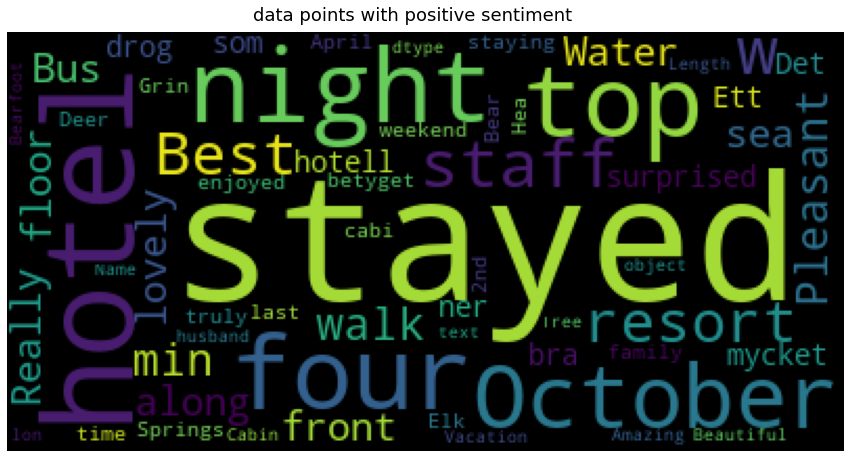

In [54]:
# plot word cloud for training data with positive examples
plot_wordcloud(df1[df1['rating'] == 'POSITIVE']['text'], 'data points with positive sentiment')

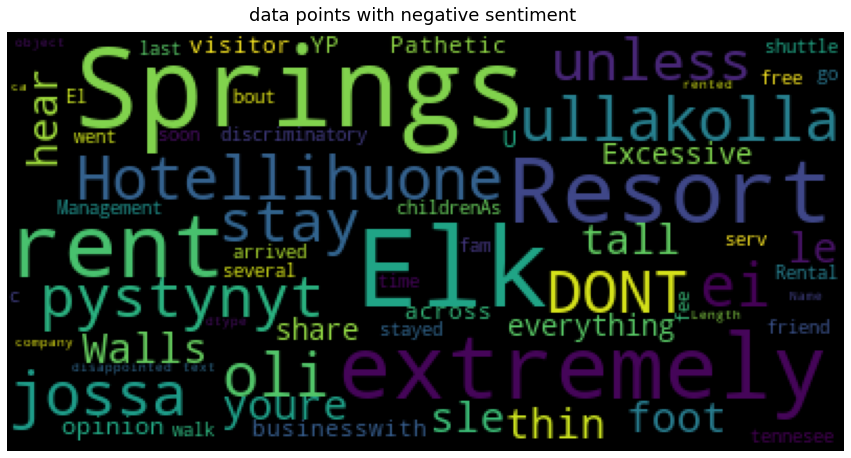

In [55]:
# plot word cloud for training data with negative examples
plot_wordcloud(df1[df1['rating'] == 'NEGATIVE']['text'], 'data points with negative sentiment')

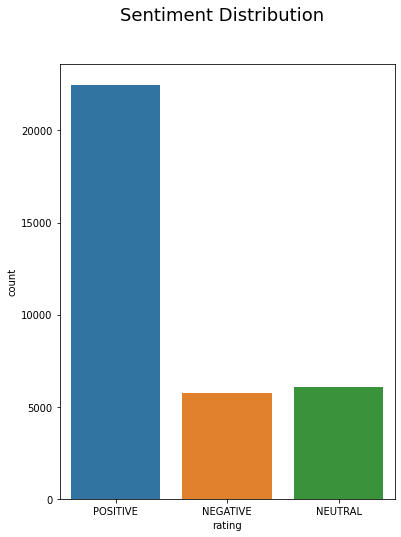

In [56]:
fig = plt.figure(figsize=[6,8])
plt.suptitle('Sentiment Distribution', fontsize=18)
ax = sns.countplot(data=df1,x='rating')
ax.set_xticklabels(['POSITIVE', 'NEGATIVE','NEUTRAL'])
plt.show()

In [57]:
WordCloud(df1[df1['rating'] == 'POSITIVE']['text'])

#TFIdf1 VECTORIZATION

In [58]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,ENGLISH_STOP_WORDS

In [59]:
vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1,1), max_features=400).fit(df1.text)

In [60]:
x = vect.transform(df1.text)

In [61]:
X = pd.DataFrame(x.toarray(),columns=vect.get_feature_names_out())

In [62]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [63]:
X.shape

(34287, 400)

#LABEL ENCODING

In [64]:
y = df1['rating'].map({'NEGATIVE': 0,'POSITIVE' : 1, 'NEUTRAL': 2})

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

#LOGISTIC REGRESSION

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
ypred = lr.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score

In [70]:
accuracy_score(ypred,y_test)

0.7658209390492855

In [71]:
precision_score(ypred,y_test,average='weighted')

0.8403746264793716

In [72]:
recall_score(ypred,y_test,average='weighted')

0.7658209390492855

In [73]:
f1_score(ypred,y_test,average='weighted')

0.7946738255479178

In [74]:
confusion_matrix(ypred,y_test)

array([[ 795,  136,  236],
       [ 326, 4204,  677],
       [ 105,  126,  253]])

#RANDOM FOREST

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [76]:
rf = RandomForestClassifier()

In [77]:
rf1 = RandomForestClassifier(n_estimators=100,max_depth=20)
rf1.fit(X_train, y_train.values.ravel())
rf2 = RandomForestClassifier(n_estimators=200,max_depth=None)
rf2.fit(X_train, y_train.values.ravel())
rf3 = RandomForestClassifier(n_estimators=5,max_depth=None)
rf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=5)

In [78]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

for mdl in [rf1,rf2,rf3]:
    y_pred3 = mdl.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred3)
    precision = precision_score(y_test,y_pred3,average='weighted')
    recall = recall_score(y_test,y_pred3,average='weighted')
    f_score = f1_score(y_pred3,y_test,average='weighted')
    c_matrix = confusion_matrix(y_test,y_pred3)
    print(accuracy,precision,recall,f_score,c_matrix)

0.7321376494604841 0.7184719220712069 0.7321376494604841 0.8003138536460194 [[ 569  636   21]
 [  58 4397   11]
 [ 125  986   55]]
0.7540099154272383 0.7241230459074441 0.7540099154272383 0.7951215740895384 [[ 761  409   56]
 [ 146 4242   78]
 [ 220  778  168]]
0.7166812481773112 0.674369087724387 0.7166812481773112 0.7509519362104469 [[ 721  413   92]
 [ 268 4036  162]
 [ 275  733  158]]


#ADABOOST

In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [80]:
adaboost = AdaBoostClassifier(n_estimators=200,learning_rate=1)

In [81]:
adamodel = adaboost.fit(X_train, y_train)

In [82]:
y_pred4 = adamodel.predict(X_test)

In [83]:
accuracy_score(y_pred4,y_test)

0.7535724701079032

In [84]:
precision_score(y_pred4,y_test,average='weighted')

0.8248606295107039

In [85]:
recall_score(y_pred4,y_test,average='weighted')

0.7535724701079032

In [86]:
f1_score(y_pred4,y_test,average='weighted')

0.7812973196133502

In [87]:
confusion_matrix(y_pred4,y_test)

array([[ 758,  172,  239],
       [ 361, 4154,  671],
       [ 107,  140,  256]])

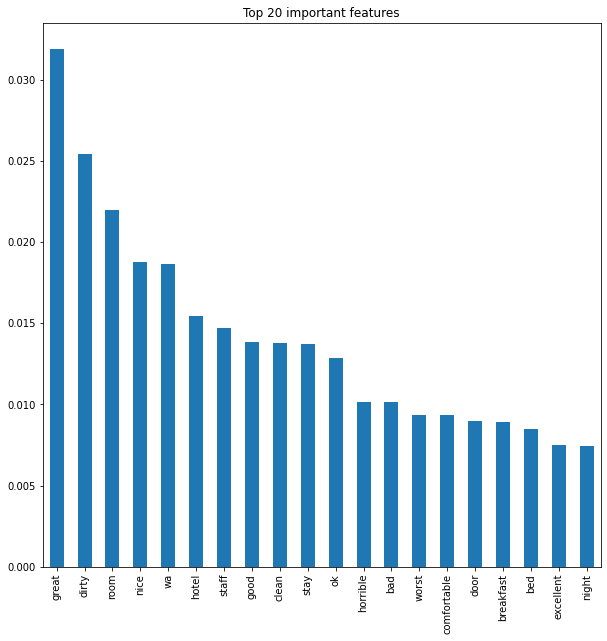

In [88]:
feat_importances = pd.Series(rf3.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='bar',figsize=(10,10))
plt.title("Top 20 important features")
plt.show()